Size: 100, Max Value: 1, Time: 0.0000 ms
Size: 10100, Max Value: 1, Time: 5.0018 ms
Size: 20100, Max Value: 1, Time: 39.9992 ms
Size: 30100, Max Value: 1, Time: 15.0001 ms
Size: 40100, Max Value: 1, Time: 20.0055 ms
Size: 50100, Max Value: 1, Time: 61.0027 ms
Size: 60100, Max Value: 1, Time: 32.0170 ms
Size: 70100, Max Value: 1, Time: 74.0008 ms
Size: 80100, Max Value: 1, Time: 81.0161 ms
Size: 90100, Max Value: 1, Time: 88.9113 ms


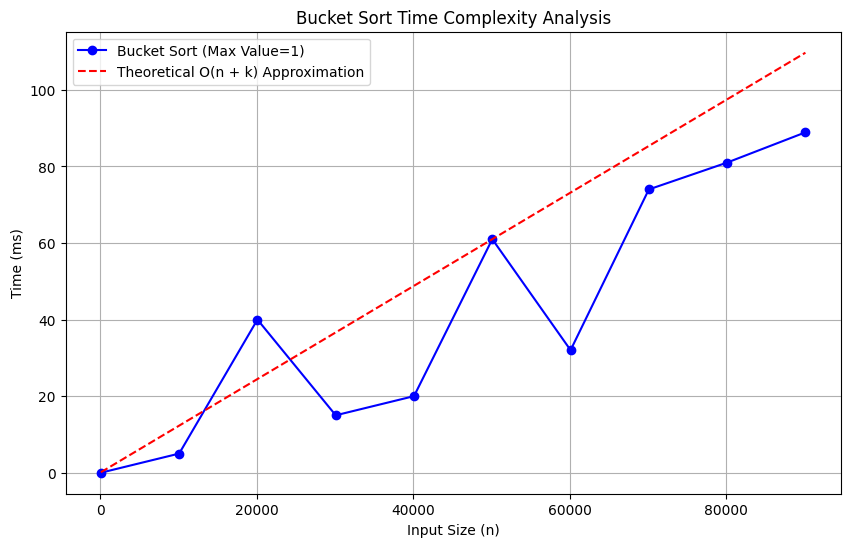

In [3]:
import matplotlib.pyplot as plt
import random
import time
import math


def insertionSort(arr):
    for j in range(1,len(arr)):
        curr=arr[j]
        prev=j-1

        while prev>=0 and arr[prev]>curr:
            arr[prev+1]=arr[prev]
            prev-=1
        arr[prev+1]=curr

def bucketSort(arr):
    n = len(arr)
    buckets = [[] for _ in range(n)]

    # Put array elements in different buckets
    for num in arr:
        bi = int(n * num)
        buckets[bi].append(num)

    # Sort individual buckets using insertion sort
    for bucket in buckets:
        insertionSort(bucket)

    # Concatenate all buckets into arr[]
    index = 0
    for bucket in buckets:
        for num in bucket:
            arr[index] = num
            index += 1

# Input sizes to test
input_sizes = list(range(100, 100001, 10000))  # From 100 to 100,000
execution_times = []

# Fixed parameters
max_val = 1  # Values will be in [0, 1]

for size in input_sizes:
    arr = [random.uniform(0, max_val) for _ in range(size)]
    
    start_time = time.time()
    bucketSort(arr.copy())
    end_time = time.time()
    
    elapsed_time = (end_time - start_time) * 1000  # ms
    execution_times.append(elapsed_time)
    print(f"Size: {size}, Max Value: {max_val}, Time: {elapsed_time:.4f} ms")

# Theoretical O(n + k) scaling (simplified model)
median_idx = len(input_sizes) // 2
median_n = input_sizes[median_idx]
median_time = execution_times[median_idx]
scaling_factor = median_time / (median_n + max_val)  # O(n + k) approximation

theoretical_times = [scaling_factor * (n + max_val) for n in input_sizes]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, 'b-o', label=f'Bucket Sort (Max Value={max_val})')
plt.plot(input_sizes, theoretical_times, 'r--', label='Theoretical O(n + k) Approximation')
plt.title("Bucket Sort Time Complexity Analysis")
plt.xlabel("Input Size (n)")
plt.ylabel("Time (ms)")
plt.legend()
plt.grid(True)
plt.show()
